In [1]:
import pandas as pd
import xgi

In [2]:
#Read in CSV file with coding
df = pd.read_csv("Final Coding.csv",keep_default_na=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    1129 non-null   int64 
 1   tweet_id                      1129 non-null   int64 
 2   user_username                 1129 non-null   object
 3   text                          1129 non-null   object
 4   created_at                    1129 non-null   object
 5   conversation_id               1129 non-null   int64 
 6   lang                          1129 non-null   object
 7   possibly_sensitive            1129 non-null   bool  
 8   author_id                     1129 non-null   int64 
 9   source                        1129 non-null   object
 10  in_reply_to_user_id           1129 non-null   object
 11  user_verified                 1129 non-null   bool  
 12  user_profile_image_url        1129 non-null   object
 13  user_name         

In [6]:
#The codes were in 5 different columns; lets aggregate them into a new column
df["all codes"] = df[["SO code","BC code","BtC code","CCM code","SJEDI code"]].agg(';'.join,axis=1)

#We want to iterate through each tweet, and if it is a new hyper-edge, add it to weighted_edge_dict
#If it is an edge that is already there, we bump the weight up by 1.
weighted_edge_dict = {}
for row in df.itertuples():
    codes=row[45].split(';')                    #Distince codes were delimited by ;
    codes=[s.strip() for s in codes if s]       #Get rid of some leading spaces
    codes.sort()                                #Sort, so we don't have duplicates
    codes=';'.join(codes)                       #Join them back together into one string
    if codes in weighted_edge_dict.keys():
        weighted_edge_dict[codes]+=1
    else:
        weighted_edge_dict[codes]=1
            
#We have the information we need, but need to reformat for the xqi library.
#The goal is to produce a list of tuples, each tuple should have the 
#names of the nodes in the hyperedge in the first n-1 spots, and the weight in the n-th spot
weighted_edge_list=list(weighted_edge_dict.items())
weighted_edge_list_formatted=[]
for el in weighted_edge_list:
    weighted_edge_list_formatted.append(tuple(el[0].split(';'))+(el[1],))
print(weighted_edge_list_formatted)

[('bipoc', 'gender', 'lgbtq', 'talk support', 4), ('amplification', 'influencers', 'representation', 'talk support', 30), ('amplification', 'talk support', 'thankful', 3), ('emotional support', 'talk support', 2), ('BC impact', 'talk support', 4), ('SO impact', 'amplification', 'influencers', 'talk support', 'thankful', 5), ('amplification', 'hashtags', 'indigenous', 'talk support', 12), ('BC impact', 'hashtags', 'thankful', 2), ('influencers', 'talk support', 5), ('BC impact', 'advocacy', 11), ('amplification', 'lgbtq', 'talk support', 19), ('BC impact', 'hashtags', 7), ('CC impact', 'SJEDI impact', 'SO impact', 'thankful', 3), ('belonging', 'influencers', 3), ('belonging', 2), ('talk support', 6), ('amplification', 'learning', 'thankful', 3), ('influencers', 'talk support', 'thankful', 'virtual participation', 3), ('amplification', 'influencers', 'power', 'representation', 2), ('amplification', 'hashtags', 'representation', 'talk support', 15), ('amplification', 'influencers', 'repre

In [4]:
H = xgi.Hypergraph()
H.add_weighted_edges_from(weighted_edge_list_formatted)

In [5]:
print(H)

Unnamed Hypergraph with 35 nodes and 216 hyperedges


<AxesSubplot:>

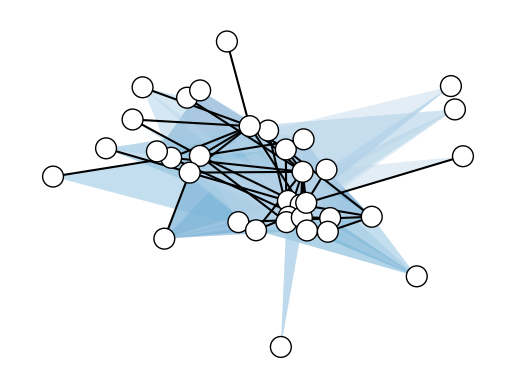

In [8]:
xgi.draw(H)

In [12]:
dict(sorted(xgi.clique_eigenvector_centrality(H).items(), key=lambda item: -1*item[1])) 

{'amplification': 0.12780472140446736,
 'talk support': 0.1189195880760375,
 'hashtags': 0.11089739075846876,
 'influencers': 0.09776852372642486,
 'power': 0.05743041122442991,
 'representation': 0.05209918578418302,
 'humanize': 0.04317917119904656,
 'bipoc': 0.04162943009019716,
 'math practice': 0.04005385041270169,
 'indigenous': 0.038802747030791784,
 'gender': 0.033758409959062624,
 'advocacy': 0.03255185258402353,
 'BC impact': 0.02803622539071616,
 'strategic planning': 0.019217754257627825,
 'thankful': 0.0180864988998677,
 'lgbtq': 0.017394594207099084,
 'current events': 0.016656131249390364,
 'conversation': 0.015465542227332901,
 'allyship in math': 0.014182471559075541,
 'learning': 0.01409046545672303,
 'emotional support': 0.010028752800436599,
 'jmm experience': 0.00983095657633552,
 'belonging': 0.009756303471298456,
 'SO impact': 0.00854879811163832,
 'math experience': 0.004448163056753384,
 'economic': 0.004279540375147437,
 'disrupteverything': 0.0033933086584511